---
title: "HW 2"
format:
  pdf:
    documentclass: scrartcl
    pdf-engine: xelatex
date: 2024-02-09
authors:
  - name: "Rigoberto Jaciel Martinez Madriz"
    affiliation: "ITESO"
---

# Tarea 2

Objetivo: Construir un portafolio compuesto por maximo 4 activos financieros, buscando la menor correlación posible, ponderados igualitariamente.

Inicialmente comenzamos por definir la ventana de tiempo para el análisis de los precios, así como los tickets de los activos seleccionados para minimizar la correlación del portafolio.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

In [2]:
start_date = "2021-01-01"
end_date = "2026-02-03"

In [3]:
tickets = ['VALUEGFO.MX', 'FPLUS16.MX', 'KUOB.MX', 'LAMOSA.MX']

In [4]:
num_assets = len(tickets)

weight = np.ones(num_assets) / num_assets
weight

array([0.25, 0.25, 0.25, 0.25])

In [5]:
prices = yf.download(tickets,start=start_date, end=end_date)["Close"]
prices.head(3)

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  4 of 4 completed

4 Failed downloads:
['KUOB.MX', 'VALUEGFO.MX', 'LAMOSA.MX', 'FPLUS16.MX']: TypeError("'NoneType' object is not subscriptable")


Ticker,FPLUS16.MX,KUOB.MX,LAMOSA.MX,VALUEGFO.MX
Date,,,,


## Rendimiento del portafolio

Obtenemos el rendimiento de los activos

In [6]:
returns = prices.pct_change().dropna()
returns.head(3)

Ticker,FPLUS16.MX,KUOB.MX,LAMOSA.MX,VALUEGFO.MX
Date,,,,
2021-01-05,-0.031925,0.000000,-0.001605,0.0
2021-01-06,0.028128,-0.003775,0.000000,0.0
2021-01-07,-0.027359,0.000000,0.000000,0.0


Calculamos el rendimiento promedio por activo

In [7]:
assets_return = returns.mean()
assets_return

Ticker
FPLUS16.MX    -0.000123
KUOB.MX        0.000414
LAMOSA.MX      0.000913
VALUEGFO.MX    0.000217
dtype: float64

Calculamos el rendimiento del portafolio diario

In [8]:
portfolio_return = np.sum(assets_return * weight)
portfolio_return

np.float64(0.00035532551501717493)

Calculamos el rendimiento anualizado del portafolio

In [9]:
portfolio_return_annualized = portfolio_return * 252
portfolio_return_annualized

np.float64(0.08954202978432808)

## Varianza del portafolio

Varianza del portafolio diaria

In [10]:
portfolio_variance = weight.T @ returns.cov() @ weight
portfolio_variance

np.float64(0.0001638735804621633)

Varianza del portafolio anualizada

In [11]:
portfolio_variance_annualized = portfolio_variance * 252
portfolio_variance_annualized

np.float64(0.04129614227646515)

## Volatilidad del portafolio

Volatilidad del portafolio diaria

In [12]:
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

np.float64(0.012801311669597115)

In [13]:
portfolio_volatility_annualized = np.sqrt(portfolio_variance_annualized)
portfolio_volatility_annualized

np.float64(0.20321452279909807)

## Matriz de correlación

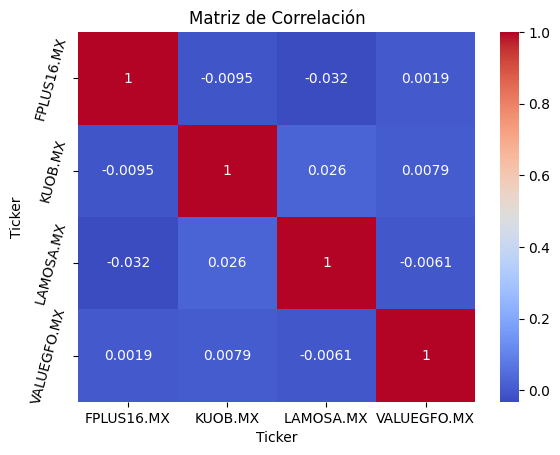

In [14]:
correlation_matrix = returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.yticks(rotation=75)
plt.title('Matriz de Correlación')
plt.show()

## Conclusion

### Riesgo no sistemático

En los activos analizados, el riesgo no sistemático (idiosincrático) se observa bastante diversificado: sus magnitudes son cercanas a cero y, en la mayoría de los casos, inferiores a 0.3. Esto es positivo para el portafolio, porque reduce la probabilidad de que eventos específicos de una empresa o sector distorsionen de forma significativa el comportamiento agregado. En consecuencia, una mayor proporción de la variación del portafolio estaría asociada al componente sistemático, es decir, al riesgo común vinculado al mercado (o a los factores que comparten los activos).

### Metricas de rendimiento y riesgo

Aunque el portafolio seleccionado logra una baja correlación entre activos, las métricas sugieren que la asignación de pesos puede no ser la más eficiente. En particular, si la volatilidad anualizada es mayor que el rendimiento anualizado, el portafolio estaría asumiendo un nivel de riesgo relativamente alto para la compensación esperada. Esto indica margen de mejora en la optimización de pesos, buscando un balance más favorable entre rendimiento y riesgo (por ejemplo, mejorando el desempeño ajustado por riesgo).